In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
dfAll = pd.read_csv("fashion-mnist_train.csv")
df = dfAll[((dfAll.label == 0) | (dfAll.label == 1))]

In [15]:
df.shape

(12000, 785)

In [16]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,...,164,177,163,0,0,1,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,0,0,0,0,0,0,0,0,0,40,...,125,93,87,49,0,0,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
df.label

3        0
10       0
13       0
24       0
29       1
        ..
59967    0
59969    1
59980    0
59990    0
59996    1
Name: label, Length: 12000, dtype: int64

In [18]:
# We will split our data

from sklearn.model_selection import train_test_split

X = df.drop(["label"], axis=1)
Y = df.label
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

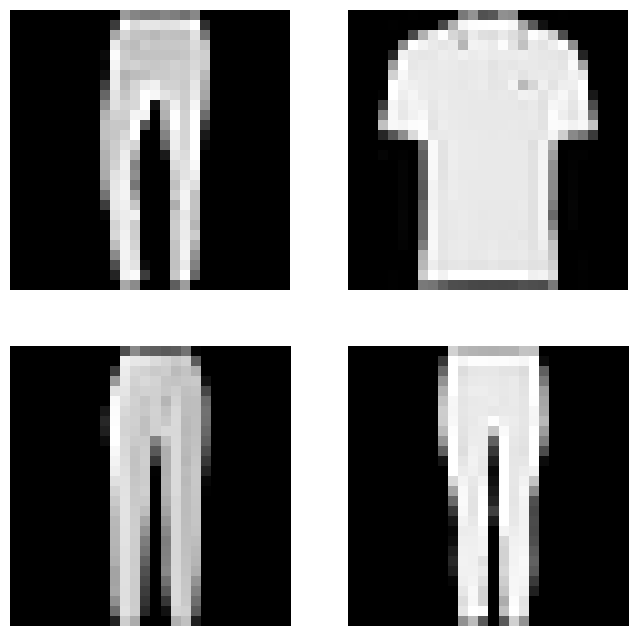

In [19]:
# Example Images

plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.imshow(x_train.head().values[i].reshape(28,28), cmap='gray', interpolation='none')

In [20]:
x_train = x_train.values.T
y_train = y_train.values.reshape(8400,1).T
x_test = x_test.values.T
y_test = y_test.values.reshape(3600,1).T

In [21]:
# Install the SciKeras package
!pip install scikeras

# Import the KerasClassifier from the correct module
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def buildClassifier():
    classifier = Sequential()
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu", input_dim=x_train.shape[0])) # Hidden Layer 1 with 8 nodes
    classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))  # Hidden Layer 2 with 6 nodes
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid")) # Output Layer
    classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier


classifier = KerasClassifier(build_fn=buildClassifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train.T, y = y_train.T, cv=3)
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy Mean is {:.2f}%".format(mean*100))
print("Accuracy Variance is {}".format(variance))

Epoch 1/100


C:\Users\pushp\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\pushp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.8705 - loss: 0.4251
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9783 - loss: 0.2956
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9798 - loss: 0.2027
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.9853 - loss: 0.1238
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.9863 - loss: 0.0908
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9890 - loss: 0.0653
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9871 - loss: 0.0551
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.9885 - loss: 0.0520
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9909 - loss: 0.0453
Epoch 10/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9898 - loss: 0.0395
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9934 - loss: 0.0294
Epoch 12/100
175/175 ━━━━━━━━━━━━

C:\Users\pushp\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\pushp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7939 - loss: 0.3391
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9823 - loss: 0.0472
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9835 - loss: 0.0424
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9871 - loss: 0.0355
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0348
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9916 - loss: 0.0243
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9904 - loss: 0.0278
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9913 - loss: 0.0270
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9897 - loss: 0.0257
Epoch 10/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9927 - loss: 0.0226
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9900 - loss: 0.0341
Epoch 12/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 

C:\Users\pushp\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\pushp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9008 - loss: 0.2585
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9841 - loss: 0.0460
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9857 - loss: 0.0372
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.9846 - loss: 0.0393
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.9897 - loss: 0.0252
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9883 - loss: 0.0338
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.9895 - loss: 0.0285
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.9922 - loss: 0.0213
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9924 - loss: 0.0187
Epoch 10/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9928 - loss: 0.0178
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.9951 - loss: 0.0157
Epoch 12/100
175/175 ━━━━━━━━━━━━